In [28]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)


In [29]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data()

In [30]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test =x_test_image.reshape(10000, 784).astype('float32')

In [31]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [32]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [33]:
from keras.models import Sequential
from keras.layers import Dense


In [34]:
model = Sequential()

In [35]:
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))
model.add(Dense(units=10,                
                 kernel_initializer='normal',
                 activation='softmax'))

In [36]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [38]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=0)


In [39]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation): 
    plt.plot(train_history.history[train]) 
    plt.plot(train_history.history[validation]) 
    plt.title('Train History')
    plt.ylabel(train) 
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left') 
    plt.show()


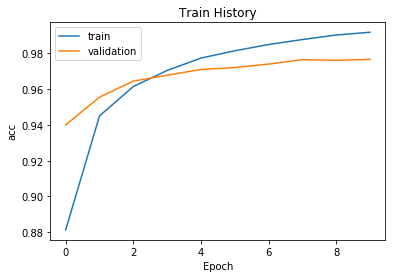

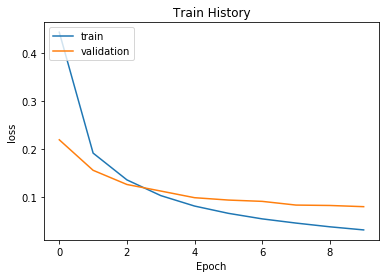

In [40]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


In [41]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot,) 
print()
print('accuracy=',scores[1])


10000/10000 [==============================] - 1s 126us/step

accuracy= 0.9767


In [42]:
prediction=model.predict_classes(x_Test)

In [43]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [44]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf() 
    fig.set_size_inches(12, 14) 
    if num>25: num=25
    for i in range(0, num): 
        ax=plt.subplot(5,5, 1+i) 
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0: 
            title+=",predict="+str(prediction[idx])

        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([]) 
        idx+=1
    plt.show()


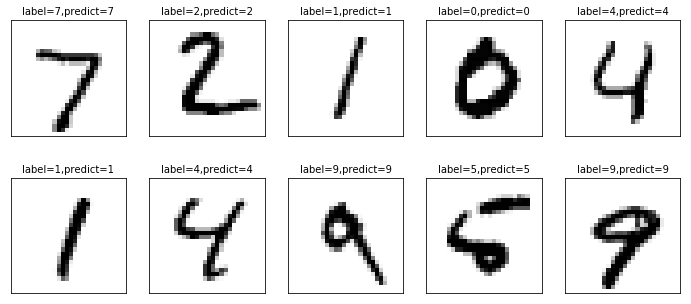

In [45]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)


In [46]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
rownames=['label'],colnames=['predict'])


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,4,0,1013,1,1,0,2,4,7,0
3,0,0,4,990,0,2,0,3,6,5
4,1,0,5,1,961,0,3,0,2,9
5,3,0,0,17,1,854,7,1,6,3
6,5,3,3,1,4,3,937,0,2,0
7,0,5,12,7,1,0,0,990,5,8
8,3,0,3,5,1,1,1,2,957,1


In [47]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction}) 
df[:2]

,label,predict
0,7,7
1,2,2


In [48]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


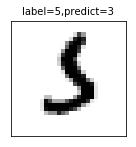

In [49]:
plot_images_labels_prediction(x_test_image,y_test_label
,prediction,idx=340,num=1)


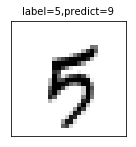

In [50]:
plot_images_labels_prediction(x_test_image,y_test_label
,prediction,idx=1289,num=1)
